# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Magnus Carlsen Games Dataset](https://www.kaggle.com/datasets/dhrubangtalukdar/magnus-carlsen-chess-com-games/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

/kaggle/input/magnus-carlsen-chess-com-games/magnus_carlsen_games.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('magnus_carlsen_games.csv')

## Preprocessing

## Frist five row

In [3]:
df.head()

,id,player_name,opponent_name,player_rating,opponent_rating,format,date,year,result,player_color,opponent_color,result_raw,moves
0,0,Magnus Carlsen,RainnWilson,2862,1200,Rapid,2014-12-14,2014,Win,white,black,1-0,1. e4 g6 2. Nf3 d6 3. d4 Bg7 4. Bc4 Bg4 5. Bxf...
1,1,Magnus Carlsen,solskytz,2862,1702,Rapid,2014-12-14,2014,Win,white,black,1-0,1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. e3 c5 5. Ne2 ...
2,2,Magnus Carlsen,Tildenbeatsu,2862,1200,Rapid,2014-12-14,2014,Win,white,black,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. ...
3,3,Magnus Carlsen,mtmnfy,2862,1200,Rapid,2014-12-14,2014,Win,white,black,1-0,1. d4 e6 2. e4 d5 3. Nd2 Nc6 4. Ngf3 Nf6 5. e5...
4,4,Magnus Carlsen,stepanosinovsky,2862,2360,Rapid,2014-12-14,2014,Loss,white,black,0-1,1. d4 Nf6 2. Bg5 c5 3. d5 Ne4 4. Bc1 e6 5. c4 ...


## last Five row

In [4]:
df.tail()

,id,player_name,opponent_name,player_rating,opponent_rating,format,date,year,result,player_color,opponent_color,result_raw,moves
6694,6694,Magnus Carlsen,BogdanDeac,2854,2724,Blitz,2026-01-02,2026,Win,white,black,1-0,1. c4 b6 2. Nbc3 g6 3. d3 Bg7 4. b4 c5 5. Bb2 ...
6695,6695,Magnus Carlsen,mishanick,2859,2689,Blitz,2026-01-02,2026,Win,black,white,1-0,1. b4 b5 2. Nb3 e6 3. e3 Bf6 4. Bxf6 gxf6 5. B...
6696,6696,Magnus Carlsen,jefferyx,2849,2781,Blitz,2026-01-02,2026,Loss,white,black,0-1,1. d4 g6 2. b3 f5 3. g3 Nf7 4. Nd3 Bg7 5. c4 O...
6697,6697,Magnus Carlsen,DonkyDonkyDonkey,2853,2645,Blitz,2026-01-02,2026,Win,black,white,1-0,1. f4 g6 2. g3 f5 3. Nc3 Bxc3 4. bxc3 d6 5. Nb...
6698,6698,Magnus Carlsen,artooon,2860,2794,Blitz,2026-01-02,2026,Win,white,black,1-0,1. d4 d5 2. f3 c6 3. e4 f6 4. Nc3 Ng6 5. h4 h5...


## Shape of our dataset

In [5]:
df.shape

(6699, 13)

## List out all columns

In [6]:
df.columns

Index(['id', 'player_name', 'opponent_name', 'player_rating',
       'opponent_rating', 'format', 'date', 'year', 'result', 'player_color',
       'opponent_color', 'result_raw', 'moves'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

id                  int64
player_name        object
opponent_name      object
player_rating       int64
opponent_rating     int64
format             object
date               object
year                int64
result             object
player_color       object
opponent_color     object
result_raw         object
moves              object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6699 non-null   int64 
 1   player_name      6699 non-null   object
 2   opponent_name    6699 non-null   object
 3   player_rating    6699 non-null   int64 
 4   opponent_rating  6699 non-null   int64 
 5   format           6699 non-null   object
 6   date             6699 non-null   object
 7   year             6699 non-null   int64 
 8   result           6699 non-null   object
 9   player_color     6699 non-null   object
 10  opponent_color   6699 non-null   object
 11  result_raw       6699 non-null   object
 12  moves            6695 non-null   object
dtypes: int64(4), object(9)
memory usage: 680.5+ KB


## Check Null Value

In [9]:
df.isnull().sum()

id                 0
player_name        0
opponent_name      0
player_rating      0
opponent_rating    0
format             0
date               0
year               0
result             0
player_color       0
opponent_color     0
result_raw         0
moves              4
dtype: int64

## Remove Moves Column

In [10]:
df.drop(columns=['moves'], inplace=True)

## Check Dupicate Value

In [11]:
df.duplicated().sum()

np.int64(0)

## Summary

In [12]:
df.describe()

,id,player_rating,opponent_rating,year
count,6699.000000,6699.000000,6699.000000,6699.000000
mean,3349.000000,3223.602478,2962.436483,2023.460069
std,1933.979059,129.367877,258.192988,1.723239
min,0.000000,2619.000000,259.000000,2014.000000
25%,1674.500000,3212.000000,2907.500000,2023.000000
50%,3349.000000,3258.000000,3026.000000,2024.000000
75%,5023.500000,3299.000000,3095.000000,2025.000000
max,6698.000000,3401.000000,3429.000000,2026.000000


# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

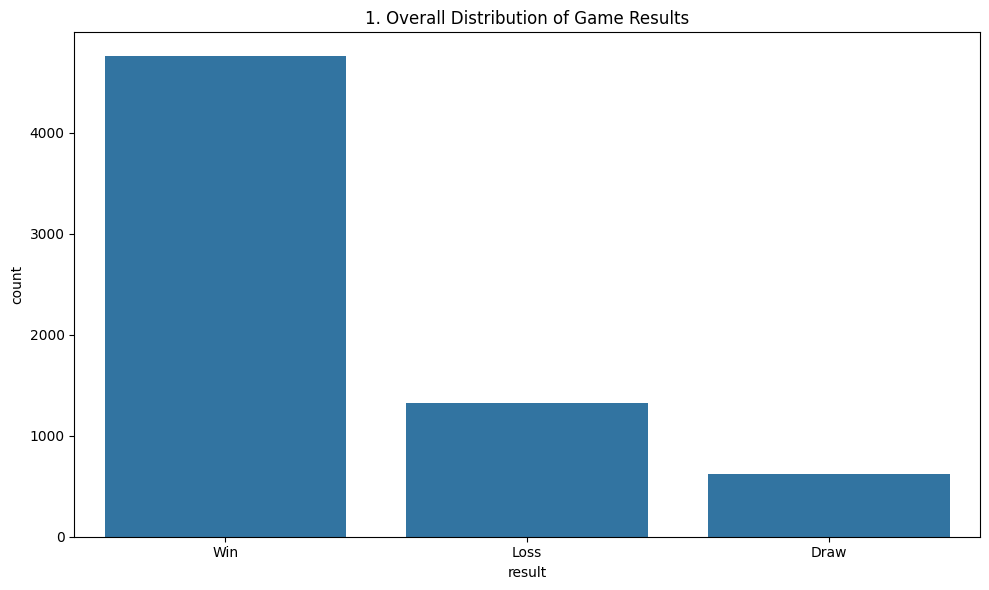

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='result')
plt.title(f'{plot_no}. Overall Distribution of Game Results')
show_fig()
plot_no += 1


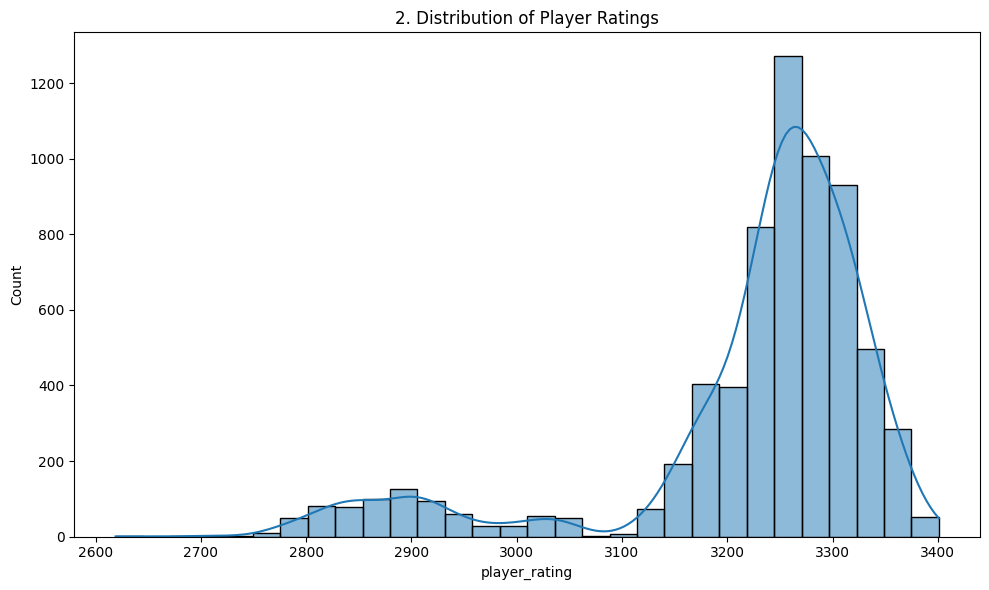

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['player_rating'], bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Player Ratings')
show_fig()
plot_no += 1


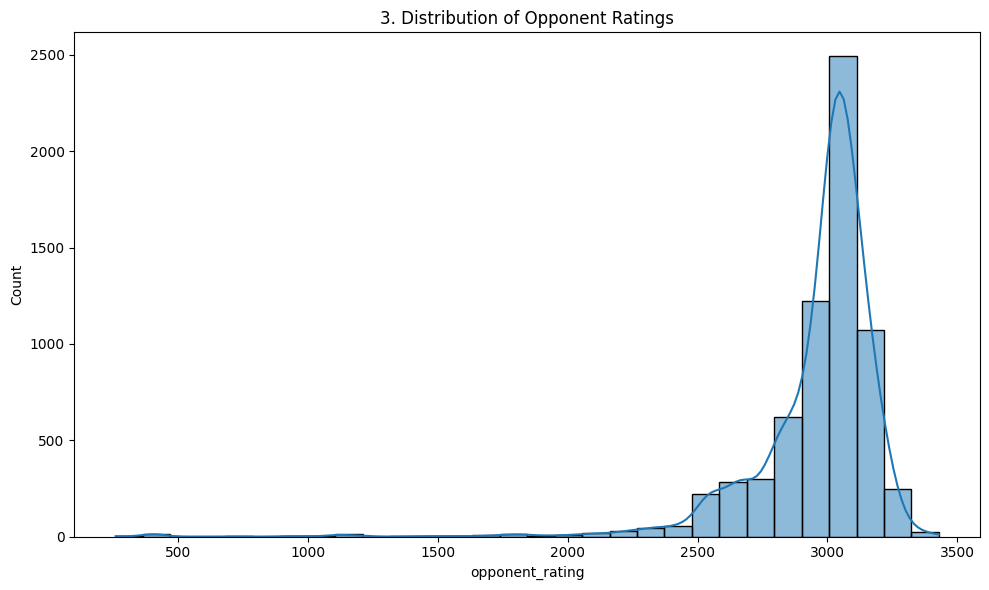

In [16]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['opponent_rating'], bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Opponent Ratings')
show_fig()
plot_no += 1


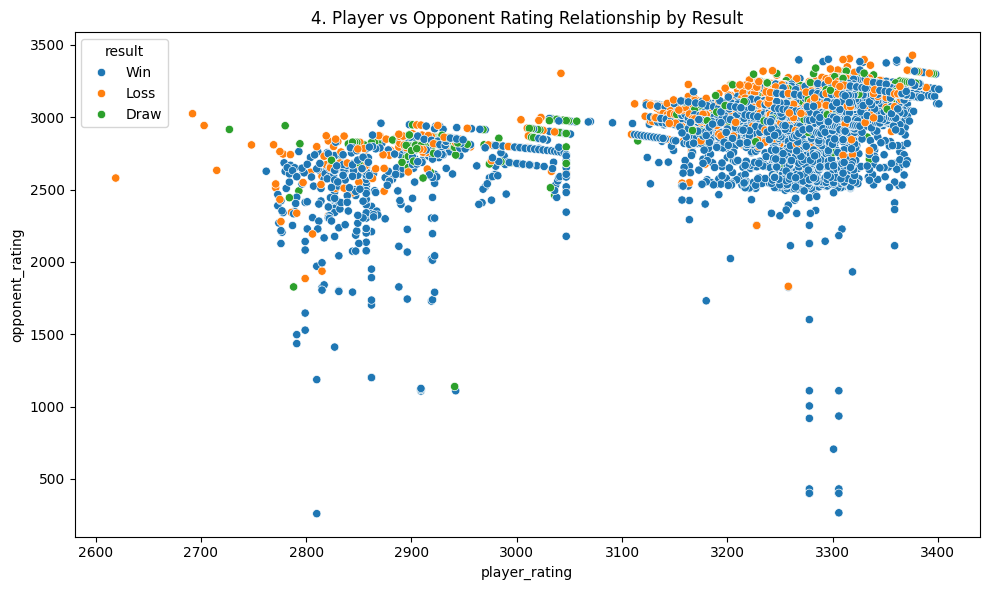

In [17]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='player_rating', y='opponent_rating', hue='result')
plt.title(f'{plot_no}. Player vs Opponent Rating Relationship by Result')
show_fig()
plot_no += 1


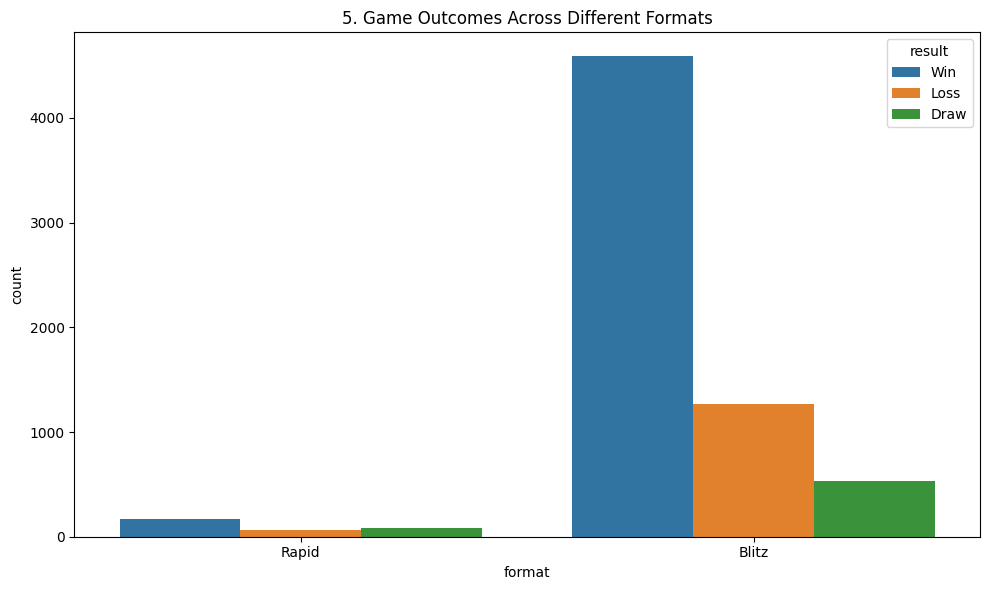

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='format', hue='result')
plt.title(f'{plot_no}. Game Outcomes Across Different Formats')
show_fig()
plot_no += 1


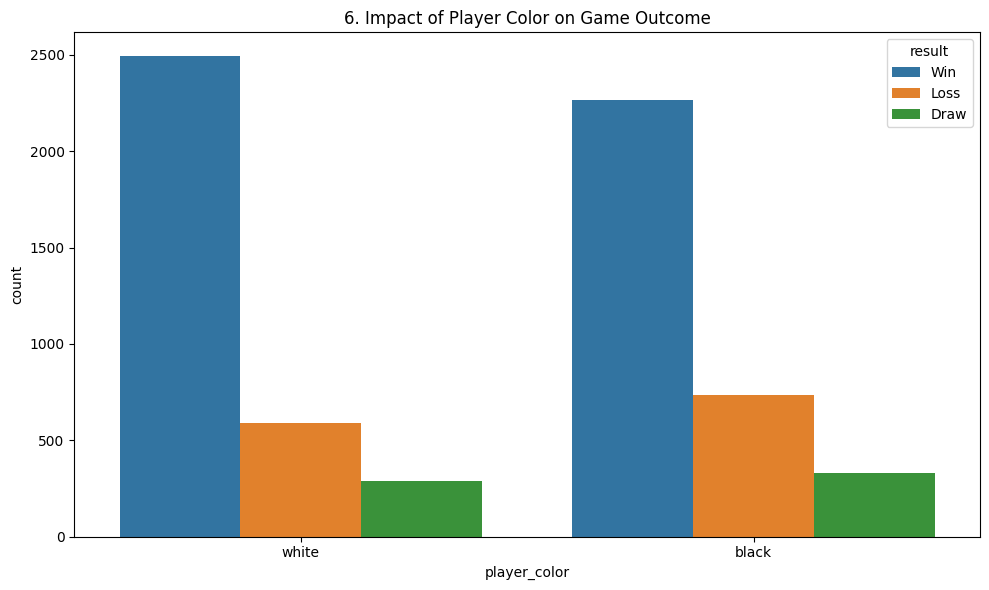

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='player_color', hue='result')
plt.title(f'{plot_no}. Impact of Player Color on Game Outcome')
show_fig()
plot_no += 1


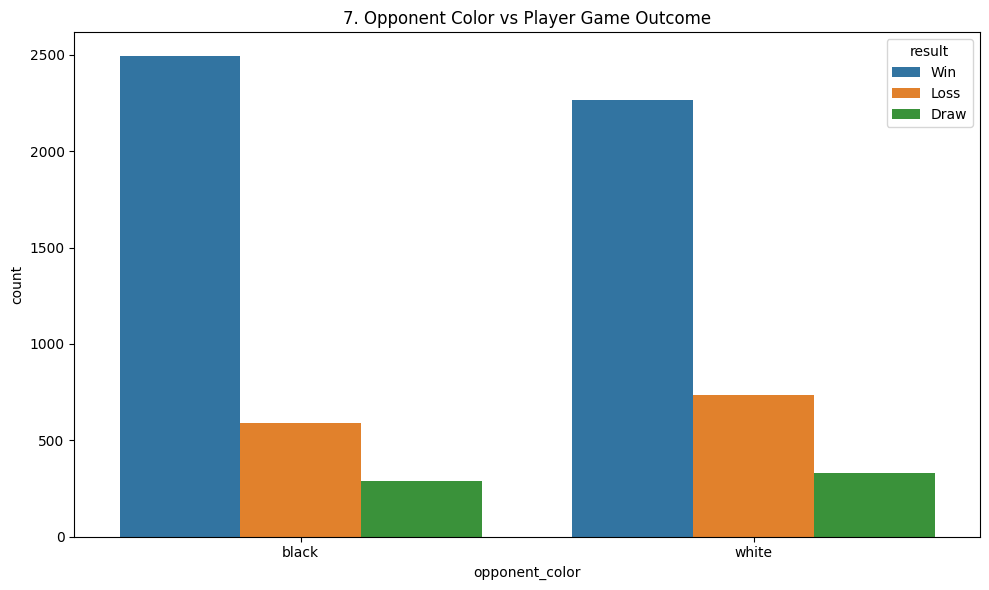

In [20]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='opponent_color', hue='result')
plt.title(f'{plot_no}. Opponent Color vs Player Game Outcome')
show_fig()
plot_no += 1


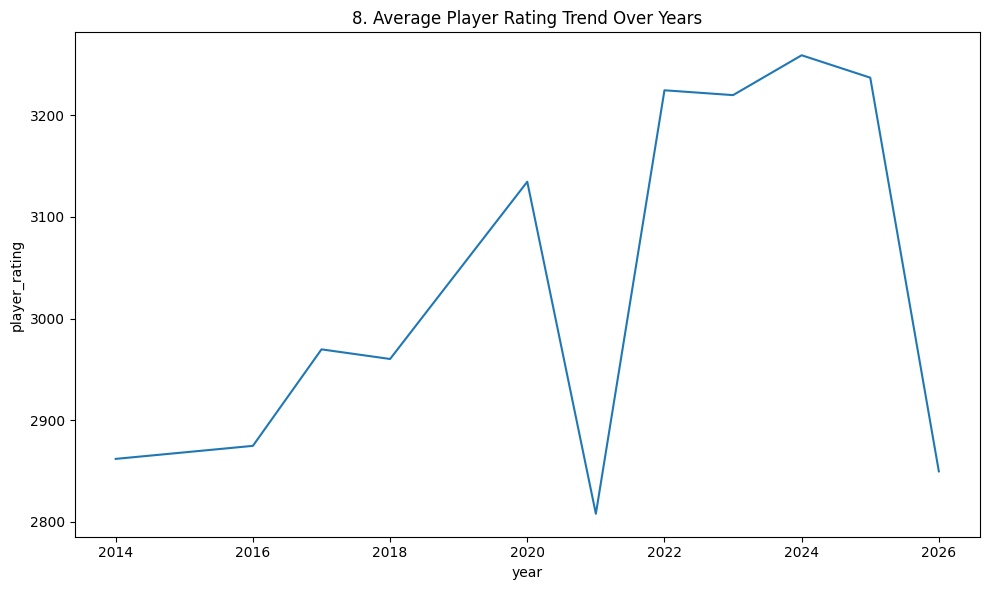

In [21]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('year')['player_rating'].mean().reset_index(), x='year', y='player_rating')
plt.title(f'{plot_no}. Average Player Rating Trend Over Years')
show_fig()
plot_no += 1


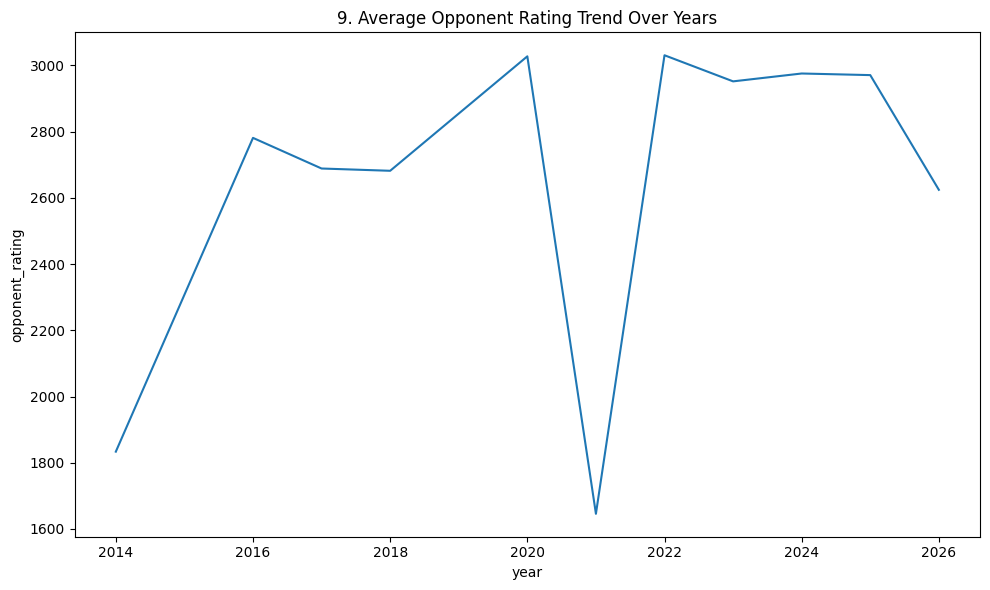

In [22]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('year')['opponent_rating'].mean().reset_index(), x='year', y='opponent_rating')
plt.title(f'{plot_no}. Average Opponent Rating Trend Over Years')
show_fig()
plot_no += 1


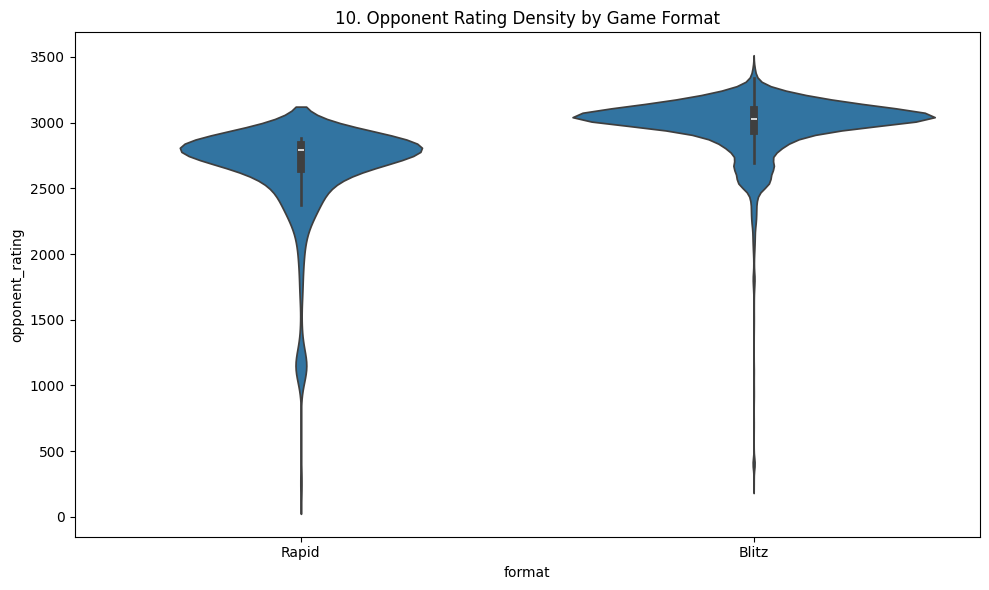

In [23]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='format', y='opponent_rating')
plt.title(f'{plot_no}. Opponent Rating Density by Game Format')
show_fig()
plot_no += 1


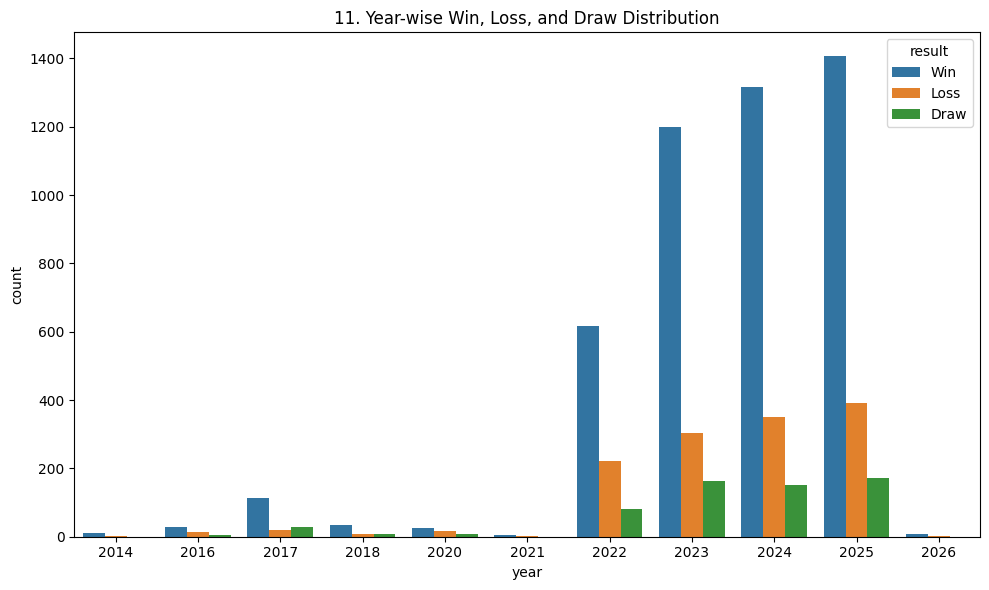

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year', hue='result')
plt.title(f'{plot_no}. Year-wise Win, Loss, and Draw Distribution')
show_fig()
plot_no += 1


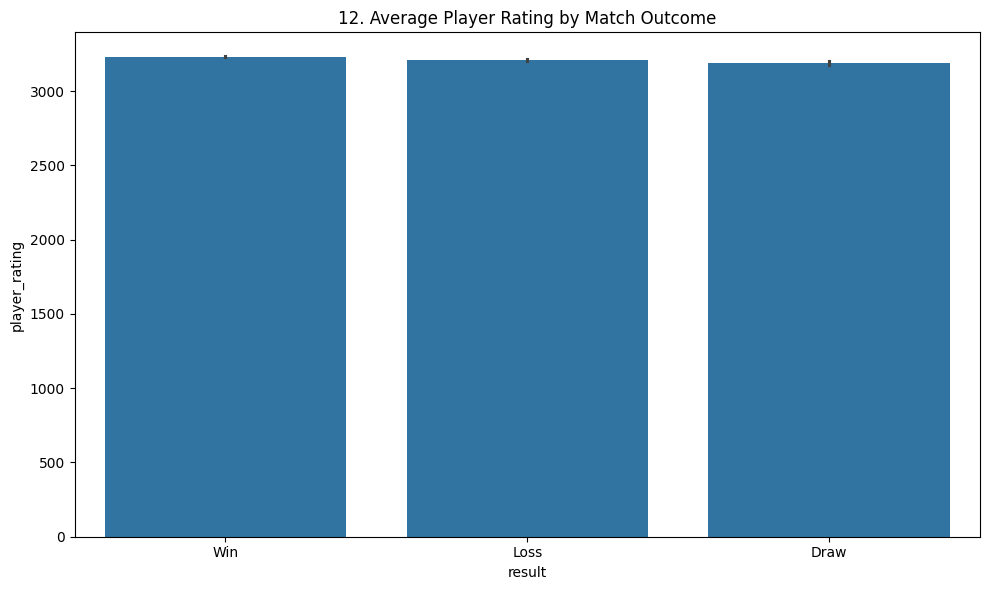

In [25]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='result', y='player_rating', estimator='mean')
plt.title(f'{plot_no}. Average Player Rating by Match Outcome')
show_fig()
plot_no += 1


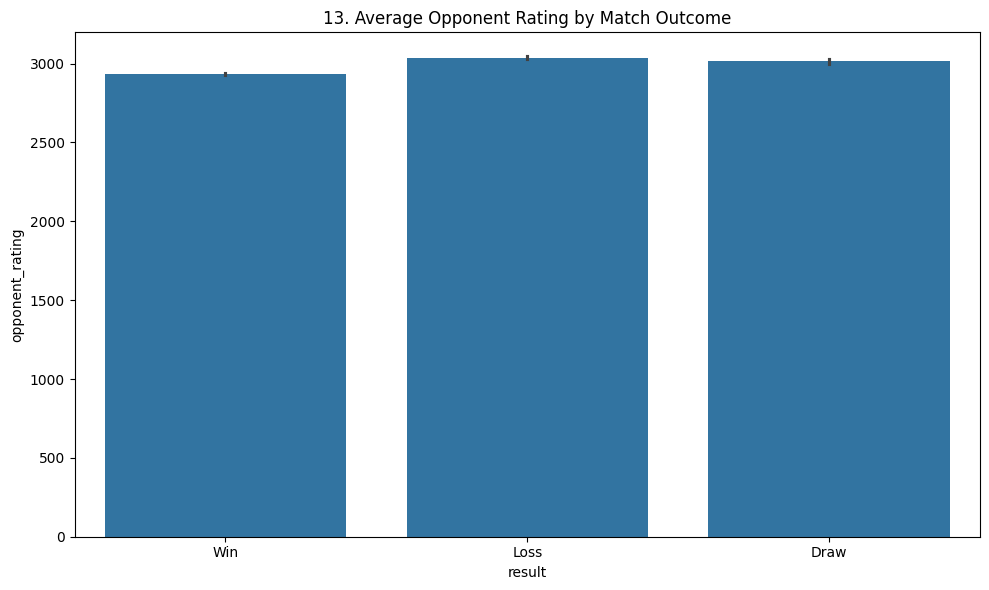

In [26]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='result', y='opponent_rating', estimator='mean')
plt.title(f'{plot_no}. Average Opponent Rating by Match Outcome')
show_fig()
plot_no += 1


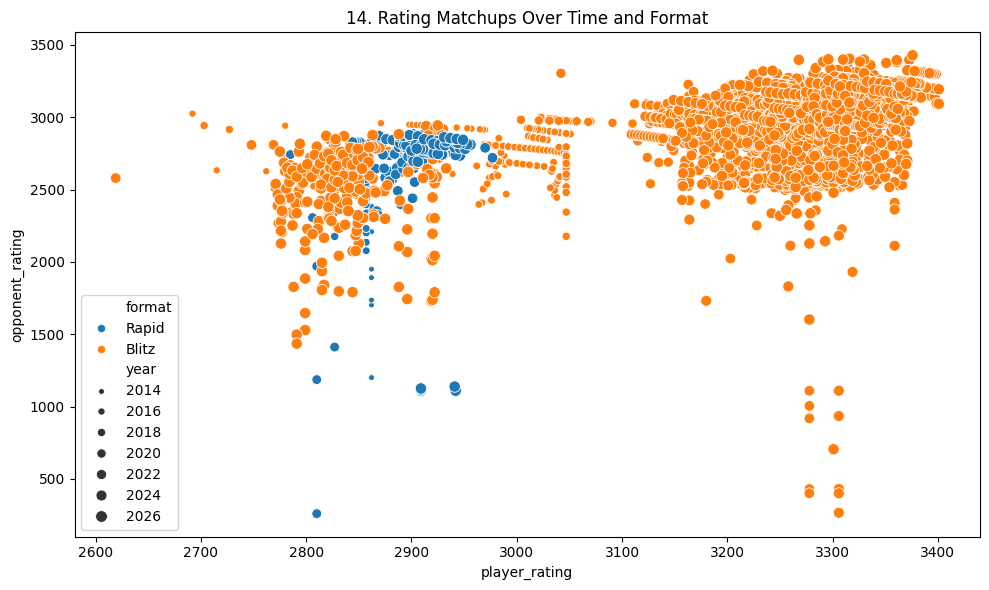

In [27]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='player_rating', y='opponent_rating', size='year', hue='format')
plt.title(f'{plot_no}. Rating Matchups Over Time and Format')
show_fig()
plot_no += 1


Text(0.5, 1.0, '15. Correlation Heatmap of Ratings and Time')

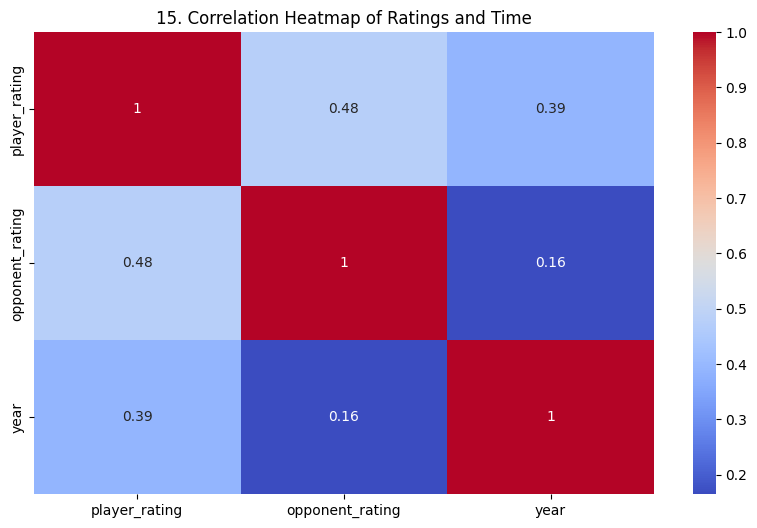

In [28]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['player_rating', 'opponent_rating', 'year']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Heatmap of Ratings and Time')

# Model Training

## Select useful features

In [29]:
X = df[['player_rating', 'opponent_rating']]

## Convert categorical result into numeric target

In [30]:
y = df['result'].map({'Win': 1, 'Loss': 0})

## Remove rows where target is NaN

In [31]:
mask = y.notna()
X = X[mask]
y = y[mask]

## Split data into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Initialize Logistic Regression model

In [33]:
model = LogisticRegression()

## Train the model

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

## Predict on test data

In [35]:
y_pred = model.predict(X_test)

## Evaluate model performance

In [36]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Model Accuracy:", accuracy)

Model Accuracy: 79.21117502054231


## Actual vs Predicted comparison

In [37]:
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
actual_vs_predicted.head()

,Actual,Predicted
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0


## Confusion Matrix

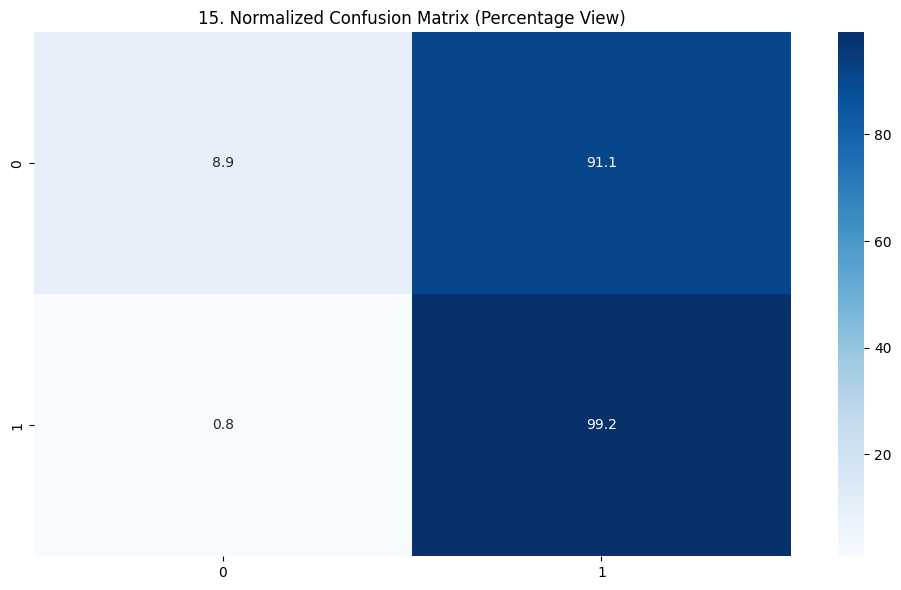

In [38]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
fig = plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred, normalize='true') * 100
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")
plt.title(f'{plot_no}. Normalized Confusion Matrix (Percentage View)')
show_fig()
plot_no += 1